# 파일 다운로드

In [3]:
import sys
from pandas import read_csv, pivot_table, melt
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.unicode_minus'] = False

In [5]:
# origin1 = read_csv('C:/Users/kimjh/산대특_데이터분석 알고리즘 개발/megaIT_da/2차 프로젝트/시간대별 카드 이용금액 현황_제주데이터랩(180101-231031).csv')
# origin2 = read_csv('C:/Users/kimjh/산대특_데이터분석 알고리즘 개발/megaIT_da/2차 프로젝트/업종별성별외식업이용정보_제주데이터랩(180101-231031).csv')
origin1 = read_csv('../../파일/종현/업종별성별카드이용정보_제주데이터랩(180101-231031).csv', encoding='euc-kr')

In [6]:
origin1.head()

,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
0,201801,건강보조식품 소매업,기타외국,알수없음,65,78,101523250
1,201801,건강보조식품 소매업,내국인,남성,159,165,25558470
2,201801,건강보조식품 소매업,내국인,알수없음,1,1,396000
3,201801,건강보조식품 소매업,내국인,여성,200,218,32041740
4,201801,건강보조식품 소매업,동남아,알수없음,8,8,1550000


In [7]:
origin1['이용자구분'].value_counts()

이용자구분
내국인     6376
제주도민    5616
법인      2795
중국      1878
기타외국    1865
일본      1113
동남아     1001
Name: count, dtype: int64

In [8]:
tmp = origin1.query('이용자구분 != "제주도민"')

In [9]:
tmp['이용자구분'] = origin1['이용자구분'].astype('category')
tmp['성별'] = origin1['성별'].astype('category')
tmp['업종명'] = origin1['업종명'].astype('category')

C:\Users\hyk\AppData\Local\Temp\ipykernel_11404\1532828591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['이용자구분'] = origin1['이용자구분'].astype('category')
C:\Users\hyk\AppData\Local\Temp\ipykernel_11404\1532828591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['성별'] = origin1['성별'].astype('category')
C:\Users\hyk\AppData\Local\Temp\ipykernel_11404\1532828591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [10]:
origin1.dtypes

연월        int64
업종명      object
이용자구분    object
성별       object
이용자수      int64
이용건수      int64
이용금액      int64
dtype: object

In [11]:
df = origin1.copy()

df['이용자구분'] = origin1['이용자구분'].astype('category')
df['성별'] = origin1['성별'].astype('category')
df['업종명'] = origin1['업종명'].astype('category')

In [25]:
숙박 = ['여관업','호텔업', '휴양콘도 운영업']
식비 = ['과실 및 채소 소매업','기타 외국식 음식점업', '기타 주점업', '기타음식료품위주종합소매업','비알콜 음료점업', '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓','육류 소매업', '일반유흥 주점업', '일식 음식점업','중식 음식점업',  '체인화 편의점', '피자, 햄버거, 샌드위치 및 유사 음식점업', '한식 음식점업', '기타음?식료품위주종합소매업']
교통 = ['내항 여객 운송업','버스 운송업','자동차 임대업',  '정기 항공 운송업','차량용 가스 충전업', '차량용 주유소 운영업','택시 운송업' ]
기타 = ['건강보조식품 소매업','골프장 운영업','관광 민예품 및 선물용품 소매업', '그외 기타 분류안된 오락관련 서비스업', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 갬블링 및 베팅업', '기타 대형 종합 소매업', '기타 수상오락 서비스업','마사지업', '면세점','스포츠 및 레크레이션 용품 임대업',  '여행사업', '욕탕업','전시 및 행사 대행업','화장품 및 방향제 소매업']

In [50]:
df1 = df.query('연월 >=201901 and 연월 <=201912')
df1


,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
3646,201901,건강보조식품 소매업,기타외국,알수없음,343,378,374081950
3647,201901,건강보조식품 소매업,내국인,남성,162,168,40399730
3648,201901,건강보조식품 소매업,내국인,여성,185,201,41201115
3649,201901,건강보조식품 소매업,동남아,알수없음,3,3,2561000
3650,201901,건강보조식품 소매업,법인,알수없음,265,292,137864570
...,...,...,...,...,...,...,...
7401,201912,휴양콘도 운영업,내국인,여성,4518,5274,414940548
7402,201912,휴양콘도 운영업,법인,알수없음,2124,2965,1005501154
7403,201912,휴양콘도 운영업,제주도민,남성,961,1138,64709065
7404,201912,휴양콘도 운영업,제주도민,여성,898,1103,46842400


In [51]:
df1['분류'] = '기타'
df1.loc[df1['업종명'] == '여관업','분류'] = '숙박'
df1.loc[df1['업종명'] == '휴양콘도 운영업','분류'] = '숙박'
df1.loc[df1['업종명'] == '호텔업','분류'] = '숙박'

df1.loc[df1['업종명'] == '서양식 음식점업','분류'] = '식비' 
df1.loc[df1['업종명'] == '일식 음식점업','분류'] = '식비' 
df1.loc[df1['업종명'] == '비알콜 음료점업','분류'] = '식비' 
df1.loc[df1['업종명'] == '피자, 햄버거, 샌드위치 및 유사 음식점업','분류'] = '식비' 
df1.loc[df1['업종명'] == '기타 외국식 음식점업','분류'] = '식비' 
df1.loc[df1['업종명'] == '한식 음식점업','분류'] = '식비' 
df1.loc[df1['업종명'] == '중식 음식점업','분류'] = '식비' 
df1.loc[df1['업종명'] == '기타 주점업','분류'] = '식비' 
df1.loc[df1['업종명'] == '체인화 편의점','분류'] = '식비' 
df1.loc[df1['업종명'] == '일반유흥 주점업','분류'] = '식비' 
df1.loc[df1['업종명'] == '육류 소매업','분류'] = '식비' 
df1.loc[df1['업종명'] == '기타음?식료품위주종합소매업','분류'] = '식비'
df1.loc[df1['업종명'] == '빵 및 과자류 소매업','분류'] = '식비' 
df1.loc[df1['업종명'] == '과실 및 채소 소매업','분류'] = '식비' 
df1.loc[df1['업종명'] == '기타음식료품위주종합소매업','분류'] = '식비' 
df1.loc[df1['업종명'] == '수산물 소매업','분류'] = '식비' 
df1.loc[df1['업종명'] == '슈퍼마켓','분류'] = '식비' 

df1.loc[df1['업종명'] == '내항 여객 운송업','분류'] = '교통'
df1.loc[df1['업종명'] == '자동차 임대업','분류'] = '교통'
df1.loc[df1['업종명'] == '정기 항공 운송업','분류'] = '교통'
df1.loc[df1['업종명'] == '차량용 주유소 운영업','분류'] = '교통'
df1.loc[df1['업종명'] == '차량용 가스 충전업','분류'] = '교통'
df1.loc[df1['업종명'] == '택시 운송업','분류'] = '교통'
df1.loc[df1['업종명'] == '버스 운송업','분류'] = '교통'

C:\Users\hyk\AppData\Local\Temp\ipykernel_11404\2744076029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['분류'] = '기타'


In [41]:
pivot1 = pivot_table(df1,
                     index='연월',
                     columns='분류',
                     values='이용금액',
                     aggfunc='sum')
pivot1.head()

분류,교통,기타,숙박,식비
연월,,,,
201801,25010301232,30836196020,10744442414,87629329044
201802,22099397995,30822141005,9392503702,82940242050
201803,24653503551,33690586679,9851284561,89704002139
201804,23867345444,37466877067,12588836258,95402354591
201805,24599194092,40793183081,13785489963,98203153479


In [42]:
pivot1.value_counts()

교통           기타           숙박           식비          
14908260775  20843121535  5198072917   67588548797     1
23148480722  37051300124  13461629302  97903349219     1
23868214456  41027689100  13853700552  99472470002     1
23867345444  37466877067  12588836258  95402354591     1
23688412001  33746783908  14922078418  99368960849     1
                                                      ..
22099397995  30822141005  9392503702   82940242050     1
22135645982  33306353236  14388939990  98719993739     1
22193702498  35016425056  14337581760  94863778526     1
22280739033  34939289353  16373504335  93107038086     1
26178145168  39202644735  19606488282  109108137952    1
Name: count, Length: 70, dtype: int64

,이용금액
분류,
교통,1526870956244
기타,2354782353415
숙박,932497139277
식비,6609045006756


<Figure size 2400x1200 with 0 Axes>

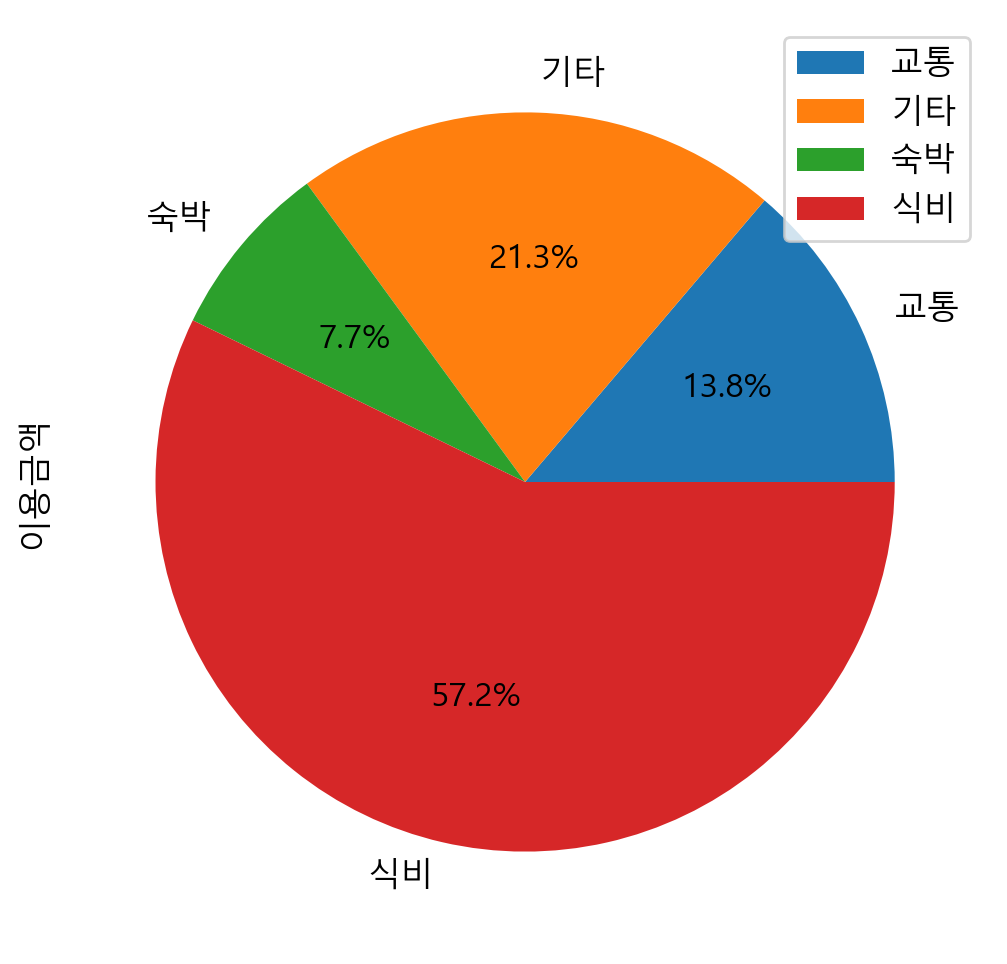

In [52]:
plt.figure()
df1[['이용금액','분류']].groupby('분류').sum().plot(kind='pie',autopct='%0.1f%%',subplots=True)
plt.show()
plt.close()

In [ ]:
['','','관광 민예품 및 선물용품 소매업', '', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 갬블링 및 베팅업', '기타 대형 종합 소매업', '기타 수상오락 서비스업','', '','스포츠 및 레크레이션 용품 임대업',  '여행사업', '욕탕업','전시 및 행사 대행업','화장품 및 방향제 소매업']


['', '기타 수상오락 서비스업','', '', '욕탕업', '기타 대형 종합 소매업','그외 기타 스포츠시설 운영업',  '','관광 민예품 및 선물용품 소매업', '','스포츠 및 레크레이션 용품 임대업', '전시 및 행사 대행업','기타 갬블링 및 베팅업', '화장품 및 방향제 소매업','여행사업']
